In [1]:
import numpy as np
import matplotlib.pyplot as plt
import polynomial_gossip as pg

# Generation of Figure 8

### Parameters

In [2]:
l = 40
n = l**2
T = 3*l
alpha_center = 0.5
beta_center = 0.5
alphas_and_betas = [(alpha_center + da, beta_center + db) for da in [-0.5,0,0.5] 
                 for db in [-0.5,0,0.5] ]
alpha_0 = 1
beta_0 = 1

methods = [("general-jacobi",alpha,beta) 
           for (alpha,beta) in alphas_and_betas]+["local averaging"]

n_graphs = 10

### Simulation

In [3]:
W = pg.build_2D_graph(n)

results_averaged = {}
for method in methods:
    results_averaged[method] = np.zeros(T)
    
for graph in range(n_graphs):
    initial_values = np.random.randn(n)
    results = pg.do_the_gossip(methods,T,W,initial_values)
    for method in methods:
        results_averaged[method] += results[method]

for method in methods:
    results_averaged[method] /= n_graphs

### Figures

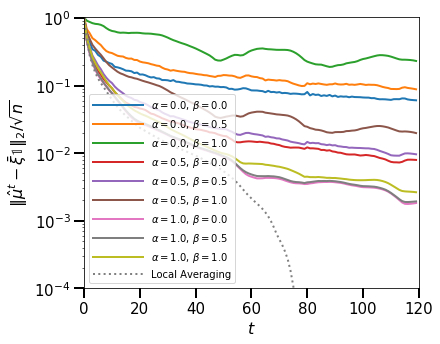

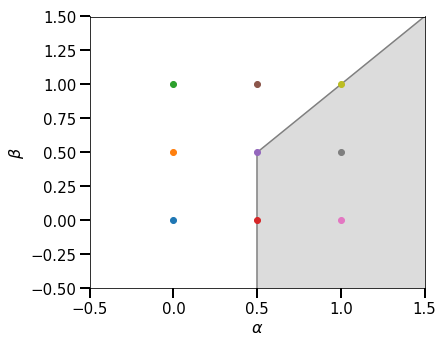

In [4]:
t_max = 3*l
ts = [t for t in range(T)]
fig1, ax1 = plt.subplots(1,1,figsize=(6,5))
fig2, ax2 = plt.subplots(1,1,figsize=(6,5))
linewidth = 2

ax2.plot([alpha_0-1/2,alpha_0-1/2],[beta_0-1/2,beta_0-5],color='grey')
ax2.plot([alpha_0-1/2,alpha_0+4],[beta_0-1/2,beta_0+4],color="grey")
ax2.fill([alpha_0-1/2,alpha_0-1/2,alpha_0+4,alpha_0+4],
         [beta_0-5,beta_0-1/2,beta_0+4,beta_0-5],
         color="gainsboro")

ax1.set_xlim(0,t_max)
colors = {}
for method in methods:
    if type(method) == tuple:
        (alpha,beta) = (method[1],method[2])
        a = ax1.semilogy(ts, np.sqrt(results[method]), 
                    label=r"$\alpha =$"+str(alpha)+', '+r"$\beta =$"+str(beta),
                     linewidth = linewidth)
        colors[method] = a[-1].get_color()
    else:
        (label,color,linestyle) = \
            pg.method_to_label_color_linestyle(method)
        ax1.plot(ts, np.sqrt(results[method]), 
                color, label=label,linestyle=linestyle,
                linewidth=linewidth)
ax1.legend(loc='lower left',handlelength=5, fontsize=10)
ax1.yaxis.set_tick_params(direction = 'out', length = 10, width = 2,
                         labelsize = 15)
ax1.xaxis.set_tick_params(direction = 'out', length = 10, width = 2,
                         labelsize = 15)
ax1.set_xlabel(r"$t$",fontsize=16)
ax1.set_ylim(10**(-4),1.05)
ax1.set_ylabel(r"$\Vert\hat{\mu}^t-\bar{\xi}\mathbb{1}\Vert_2/\sqrt{n}$",fontsize=16)

ax2.set_xlim(-0.5, 1.5)
ax2.set_ylim(-0.5, 1.5)
for method in methods:
    if type(method) ==tuple:
        (alpha,beta) = (method[1],method[2])
        ax2.plot([alpha],[beta],'ro',color=colors[method])
        ax2.plot([alpha_0])
ax2.set_xlabel(r"$\alpha$",fontsize=16)
ax2.set_ylabel(r"$\beta$",fontsize=16)
ax2.yaxis.set_tick_params(direction = 'out', length = 10, width = 2,
                         labelsize = 15)
ax2.xaxis.set_tick_params(direction = 'out', length = 10, width = 2,
                         labelsize = 15)
plt.show()